Validator 149.36.1.121 is available...
Validator 149.36.1.115 is not accessible...
Validator 192.150.253.122 is not accessible...
Validator 165.227.153.108 is available...
Validator 34.147.54.95 is not accessible...
Validator 34.44.71.163 is not accessible...
Validator 64.226.93.21 is available...
Validator 172.93.55.221 is available...
Validator 34.31.27.55 is not accessible...
Validator 66.135.5.67 is not accessible...
Validator 161.97.131.133 is available...
Validator 5.161.242.50 is available...


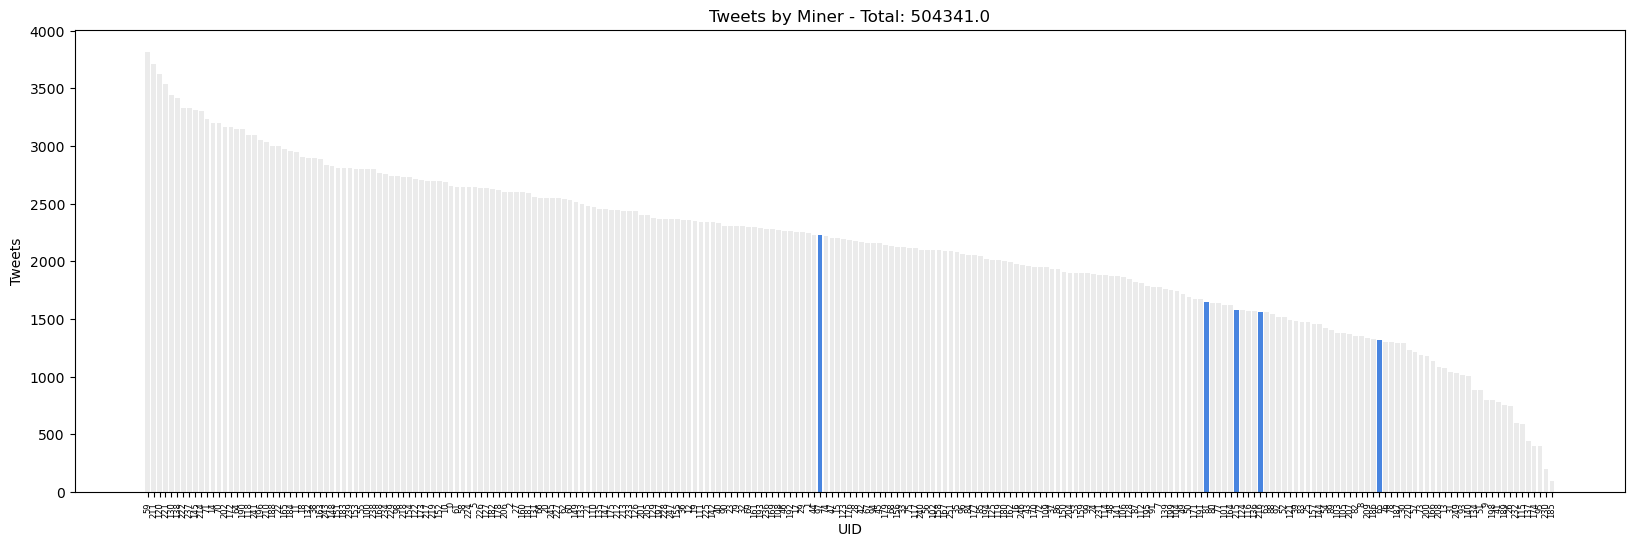

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

import requests
import bittensor as bt

tempos = 6
my_miners = ["81", "216", "215", "97", "65"]

# Connect to the mainnet bittensor netuid 42 and pull the metagraph of axons
subtensor = bt.subtensor(network="finney")
metagraph = subtensor.metagraph(netuid=42)
stakes = metagraph.S
axons = metagraph.axons
validator_axons = [axons[i] for i in range(len(axons)) if stakes[i] >= 1000]
validator_ips = [axon.ip for axon in validator_axons if axon.ip != '0.0.0.0']

healthy_validator_ips = []
for ip in validator_ips:
    try:
        response = requests.get(f"http://{ip}:8000/healthcheck", timeout=5)
        if response.ok:
            healthy_validator_ips.append(ip)
            print(f"Validator {ip} is available...")
    except requests.exceptions.RequestException as e:
        print(f"Validator {ip} is not accessible...")

# Fetch volumes from healthy validators
all_volumes = []
for ip in healthy_validator_ips:
    try:
        response = requests.get(f"http://{ip}:8000/volumes", timeout=5)
        if response.ok:
            volumes = response.json()
            all_volumes.extend(volumes[-tempos:])
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch volumes from {ip}: {e}")


# Calculate the sum of volumes for each miner
volumes_df = {}
for data in all_volumes:
    for miner, volume in data["miners"].items():
        if volume > 0:  # Only consider miners with volume greater than 0
            if miner in volumes_df:
                volumes_df[miner] += volume
            else:
                volumes_df[miner] = volume

# Convert to DataFrame for easier plotting
df = pd.DataFrame(list(volumes_df.items()), columns=['UID', 'Volume'])

# Sort the DataFrame by total volume
df = df.sort_values(by='Volume', ascending=False)

# Sum all of the volumes
total_volume = df['Volume'].sum()

# Plot the volumes
plt.figure(figsize=(20, 6))
colors = ['#4885e0' if uid in my_miners else '#ebebeb' for uid in df['UID']]
plt.bar(df['UID'], df['Volume'], color=colors)
plt.xlabel('UID')
plt.ylabel('Tweets')
plt.title("Tweets by Miner - Total: " + str(total_volume))
plt.xticks(rotation=90, fontsize=6)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>